### Logistic Regression - Label Classification

In [10]:
import sys
sys.path.append('../../')

# Import libraries
from utils.load import load
from utils.score import fold_cross_validate, visualize_classification_result, visualize_feature_importance
from utils.print import print_cross_validation_scores, print_scores
from constant.columns import FEATURES, LABEL

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

In [11]:
# Import data
df = pd.read_csv('./source/dataset.csv')
X, y = df[FEATURES], df[LABEL]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#### Find the best parameter to build the model with the best accuracy.

In [12]:
# Define the parameter grid
param_grid = [
    {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['liblinear']},
    {'penalty': ['elasticnet'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['saga'], 'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
    {'penalty': ['l2', 'none'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['lbfgs']}
]

# Create a base model
logreg = LogisticRegression()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print(f"Best parameters: {best_params}")

Fitting 5 folds for each of 105 candidates, totalling 525 fits


/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metr

[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.

/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metr

[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=

/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metr

[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ...............C=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ...............C=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...............C=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, l1_ratio=

/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

[CV] END ...............C=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.001, l1_ratio=0.3, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.001, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.001, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.001, l1_ratio=0.3, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.001, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.3, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.001, l1_ratio=0.4, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.001, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.001, l1_ratio=0.3, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.001, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.7, penalty=elasticnet, solver=saga; total time=   

/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: Conve

[CV] END C=0.001, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.001, l1_ratio=0.4, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.001, l1_ratio=0.4, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.001, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.001, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.001, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.001, l1_ratio=0.7, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.001, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.001, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.001, l1_ratio=0.4, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.001, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.001, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=

/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

[CV] END C=0.01, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.01, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.01, l1_ratio=0.3, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.001, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.01, l1_ratio=0.3, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.01, l1_ratio=0.4, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.01, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.01, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.01, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.01, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.001, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.01, l1_ratio=0.4, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0

/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

[CV] END C=0.001, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.01, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.01, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.01, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.01, l1_ratio=0.3, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.01, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.01, l1_ratio=0.4, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.01, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.01, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.01, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.01, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.3, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] EN

/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warning

[CV] END C=0.01, l1_ratio=0.7, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.01, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.01, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.01, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .C=0.1, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.01, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.01, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.01, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.01, l1_ratio=0.7, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.01, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.01, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .C=0.1, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C

/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: Conve

[CV] END C=0.1, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.1, l1_ratio=0.4, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.1, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.1, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.1, l1_ratio=0.3, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.1, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.1, l1_ratio=0.4, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.1, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.1, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.1, 

/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataC

[CV] END C=0.1, l1_ratio=0.3, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=0.1, l1_ratio=0.4, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=0.1, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=0.1, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=0.1, l1_ratio=0.3, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.1, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=0.1, l1_ratio=0.7, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=0.1, l1_ratio=0.4, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.1, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.1, l1_ratio=0.7, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.1, 

/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[CV] END C=0.1, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ...C=1, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .C=0.1, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.1, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .C=0.1, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .C=1, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .C=1, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.1, l1_ratio=0.7, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.1, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ...C=1, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .C=0.1, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.1, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .C=0.1, l1_rat

/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10

[CV] END .C=1, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .C=1, l1_ratio=0.3, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .C=1, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .C=1, l1_ratio=0.4, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .C=1, l1_ratio=0.3, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .C=1, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .C=1, l1_ratio=0.7, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .C=1, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .C=1, l1_ratio=0.3, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .C=1, l1_ratio=0.4, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=1, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .C=1, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .C=1, l1_ratio=0.5,

/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warning

[CV] END .C=1, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .C=1, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .C=1, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .C=1, l1_ratio=0.7, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ..C=10, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ...C=1, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .C=1, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .C=1, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .C=1, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=10, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ...C=1, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ..C=10, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .C=1, l1_ratio=0.9,

/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: Conve

[CV] END ..C=10, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ...C=1, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=10, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ..C=10, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .C=1, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=10, l1_ratio=0.3, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=10, l1_ratio=0.3, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=10, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ...C=1, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=10, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ..C=10, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=10, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=10, l1_ratio=0.4,

/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warning

[CV] END C=10, l1_ratio=0.7, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=10, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=10, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=10, l1_ratio=0.4, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=10, l1_ratio=0.7, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=10, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ..C=10, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=10, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=10, l1_ratio=0.7, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=10, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=10, l1_ratio=0.5,

/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10

[CV] END C=100, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=10, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=100, l1_ratio=0.3, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ..C=10, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .C=100, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .C=100, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=100, l1_ratio=0.3, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=100, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=100, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=100, l1_ratio=0.4, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=100, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=100, l1_r

/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[CV] END C=100, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=100, l1_ratio=0.4, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=100, l1_ratio=0.3, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=100, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=100, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=100, l1_ratio=0.7, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=100, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=100, l1_ratio=0.4, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=100, l1_ratio=0.7, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=100, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=100, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=100, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=100, 

/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[CV] END .C=100, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=100, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=100, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=1000, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=1000, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=100, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=100, l1_ratio=0.7, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=1000, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .C=100, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=100, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=100, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=1000, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .C=100, l

/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10

[CV] END C=1000, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=1000, l1_ratio=0.4, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=1000, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=1000, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=1000, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=1000, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=1000, l1_ratio=0.3, penalty=elasticnet, solver=saga; total time=   0.3s
[CV] END C=1000, l1_ratio=0.4, penalty=elasticnet, solver=saga; total time=   0.3s
[CV] END C=1000, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=1000, l1_ratio=0.7, penalty=elasticnet, solver=saga; total time=   0.2s


/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warning

[CV] END C=1000, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=1000, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=1000, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=1000, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=1000, l1_ratio=0.3, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=1000, l1_ratio=0.4, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=1000, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=1000, l1_ratio=0.7, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=1000, l1_ratio=0.3, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=1000, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=   0.1s[CV] END C=1000, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   0.1s

[CV] END C=1000, l1_ratio=0.4, penalty=elasticnet, solver=saga; total time=   0.1s
[CV]

/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[CV] END ..................C=0.001, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=1000, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=1000, l1_ratio=0.7, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=1000, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ................C=0.001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=1000, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=1000, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=1000, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.001, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..................C=0.001, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=1000, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .........

/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataC

[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ................C=0.001, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..................C=0.001, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .................C=0.01, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END .................C=0.01, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..................C=0.1, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.1, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ....................C=1, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .................C=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...................

/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.

[CV] END ..................C=0.1, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ....................C=1, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ....................C=1, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ...................C=10, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ..................C=0.1, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ...................C=10, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ...................C=10, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ....................C=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...................

/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector 

[CV] END ...................C=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...................C=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...................C=1000, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .................C=1000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...................C=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...................C=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .................C=1000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .................C=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END .................C=1000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .................C=1000, penalty=none, solver=lbfgs; total time=   0.0s
Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector 

#### Cross Validation

In [13]:
# Define the model
clf_cv = LogisticRegression()
scores = fold_cross_validate(clf_cv, X, y)

# Print scores
print_cross_validation_scores(scores)

/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metr

/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

MACRO:
Precision: 0.6501 (0.1531)
Recall: 0.5858 (0.0944)
F1 score: 0.5957 (0.1062)
---------------------------------
MICRO:
Precision: 0.9378 (0.0282)
Recall: 0.9378 (0.0282)
F1 score: 0.9378 (0.0282)


#### Feature Importance

/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metr

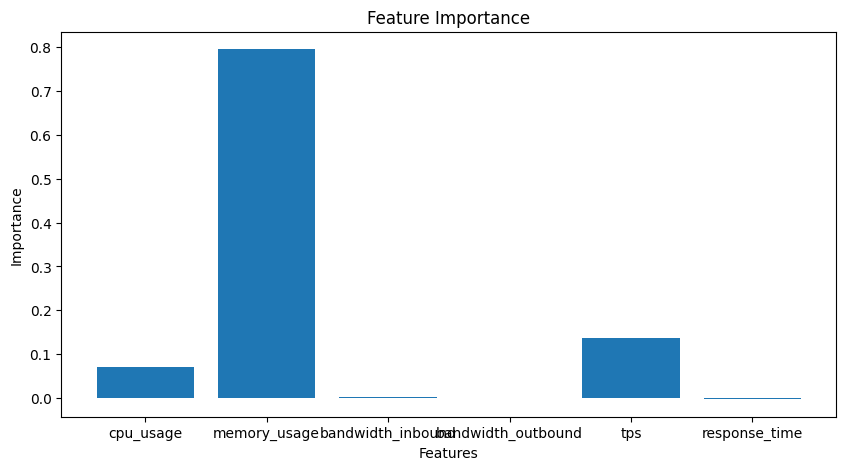

In [14]:
# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Initialize the array where we'll store the coefficients for each fold
coefficients = np.zeros((10, X.shape[1]))

# Prepare the cross-validation procedure
cv = KFold(n_splits=10)
logreg = LogisticRegression()

# Perform the cross-validation
for i, (train, test) in enumerate(cv.split(X)):
    # Split the data
    X_train, y_train = X[train], y[train]

    # fit the model with data
    logreg.fit(X_train, y_train)

    # Store the coefficients
    coefficients[i, :] = logreg.coef_[0]

# Calculate the mean coefficient for each feature across folds
mean_coefficients = coefficients.mean(axis=0)
visualize_feature_importance(mean_coefficients, FEATURES)

In [15]:
mean_coefficients

array([-5.10886928e-02, -5.82190855e-01, -1.17868307e-03,  5.46218869e-04,
       -9.99233046e-02,  1.91163978e-03])

#### Train Model

In [16]:
# Create and train the model
clf = LogisticRegression(
    penalty='l1', C=1, solver='liblinear', fit_intercept=False, max_iter=100, class_weight=None)
clf.fit(X_train, y_train)

/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, fit_intercept=False, penalty='l1', solver='liblinear')

In [17]:
# Predict and print the score
y_pred = clf.predict(X_test)
print_scores(y_test, y_pred)

Accuracy: 0.9222614840989399
Precision: 0.7777777777777778
Recall: 0.25925925925925924
F1: 0.3888888888888889


/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


#### Visualize Result

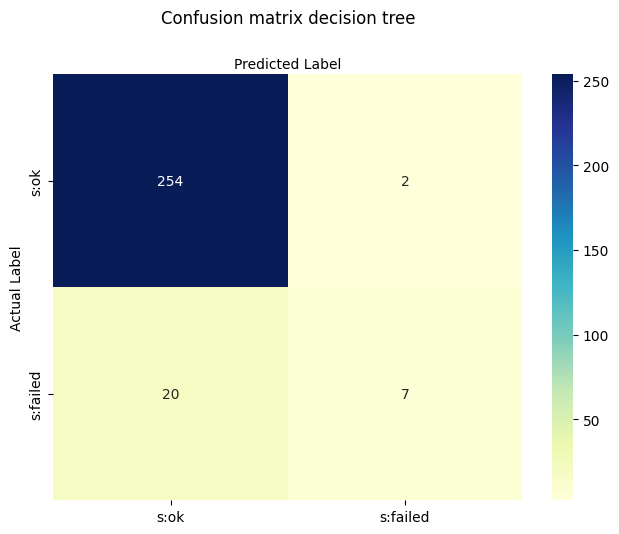

In [18]:
visualize_classification_result(y_test, y_pred)